In [2]:
# work_year:The year the salary was paid.

# experience_level: The experience level in the job during the year.

# EN > Entry-level / Junior
# MI> Mid-level / Intermediate
# SE > Senior-level / Expert
# EX > Executive-level / Director
# employment_type: The type of employment for the role.

# PT > Part-time
# FT > Full-time
# CT > Contract
# FL > Freelance

# job_title: The role worked in during the year.

# salary: The total gross salary amount paid.

# salary_currency: The currency of the salary paid as an ISO 4217 currency code.

# salaryinusd: The salary in USD.

# employee_residence: Employee's primary country of residence during the work year as an ISO 3166 country code.

# remote_ratio:The overall amount of work done remotely.

# company_location: The country of the employer's main office or contracting branch.

# company_size: The median number of people that worked for the company during the year.

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

df = pd.read_csv('data/ds_salaries.csv')

print(f"Loaded Dataset {df.shape[0]} rows, {df.shape[1]} columns")

Loaded Dataset 3755 rows, 11 columns


In [87]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [88]:
print(df.columns.tolist()) # Check the columns

['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


In [89]:
print(df['experience_level'].unique())

cleanup_map = {
    'SE': 'Senior-Level',
    'MI': 'Mid-Level',
    'EN': 'Entry-Level',
    'EX': 'Executive-Level'
}

df['experience_level'] = df['experience_level'].replace(cleanup_map)
print("FIX APPLIED")

print(df['experience_level'].unique())

['SE' 'MI' 'EN' 'EX']
FIX APPLIED
['Senior-Level' 'Mid-Level' 'Entry-Level' 'Executive-Level']


In [90]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-Level,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-Level,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-Level,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-Level,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-Level,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior-Level,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,Mid-Level,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,Entry-Level,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,Entry-Level,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [91]:
print(df['employment_type'].unique())

cleanup_map = {
    'FT': 'Full-Time',
    'CT': 'Contract',
    'FL': 'Freelance',
    'PT': 'Part-Time'
}

df['employment_type'] = df['employment_type'].replace(cleanup_map)
print("FIX APPLIED")

print(df['employment_type'].unique())

['FT' 'CT' 'FL' 'PT']
FIX APPLIED
['Full-Time' 'Contract' 'Freelance' 'Part-Time']


In [92]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-Level,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-Level,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-Level,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-Level,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-Level,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100000,US,100,US,L


In [108]:
print(df['company_size'].unique())

cleanup_map = {
    'L':'Large',
    'M':'Medium',
    'S':'Small'
}

df['company_size'] = df['company_size'].replace(cleanup_map)
print("FIX APPLIED")

print(df['company_size'].unique())

['L' 'S' 'M']
FIX APPLIED
['Large' 'Small' 'Medium']


In [93]:
# FINISHED THE CLEANING AND FORMATTING

# STARTING THE FILTERING AND ANALYSIS

# 1. Is there a correlation between experience level and salary paid?
# 2. Is there a difference in salary between companies of different sizes?
# 3. How is the geographical distribution of data professionals over the years?
# 4. How has the growth of data professionals evolved over the last 4 years?
# 5. Is there a correlation between the beginning of the pandemic and the increase in data professionals?
# 6. Who are the highest-paid professionals in the data field?

# According to the dataset provider:

# Data science helps predict future trends and outcomes based on historical data, supporting proactive planning.
# By analyzing processes and workflows, data science identifies areas for optimization, improving overall efficiency.
# Data science drives innovation by uncovering patterns, relationships, and opportunities that may not be apparent through traditional methods.
# Companies use data science to personalize products, services, and user experiences, increasing customer satisfaction.
# By optimizing processes and resources, data science can lead to significant cost savings for companies.
# Data science helps optimize supply chain operations, reducing costs and improving overall logistics efficiency.
# Data science enables a continuous improvement cycle by providing feedback and insights for the ongoing refinement of strategies and processes.

In [94]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [95]:
df.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


In [96]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [97]:
df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [98]:
df['experience_level'].value_counts()

experience_level
Senior-Level       2516
Mid-Level           805
Entry-Level         320
Executive-Level     114
Name: count, dtype: int64

In [99]:
df['company_location'].value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

In [100]:
df['company_size'].value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [101]:
df['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [102]:
df['employment_type'].value_counts()

employment_type
Full-Time    3718
Part-Time      17
Contract       10
Freelance      10
Name: count, dtype: int64

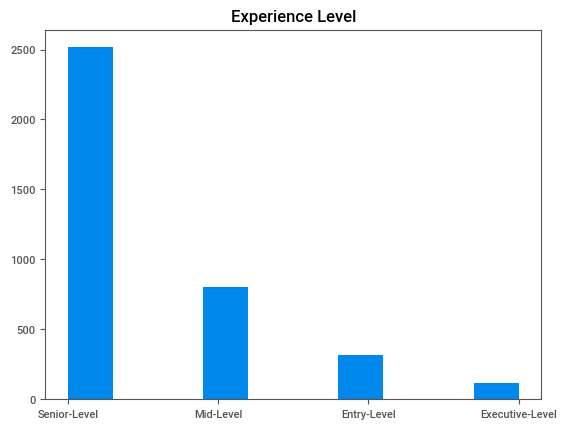

In [103]:
_ = plt.hist(df.experience_level)
_ = plt.title("Experience Level")

C:\Users\matte\AppData\Local\Temp\ipykernel_15896\2867211337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.barplot(x = top_jobs, y = top_jobs.index, palette='Oranges_r')


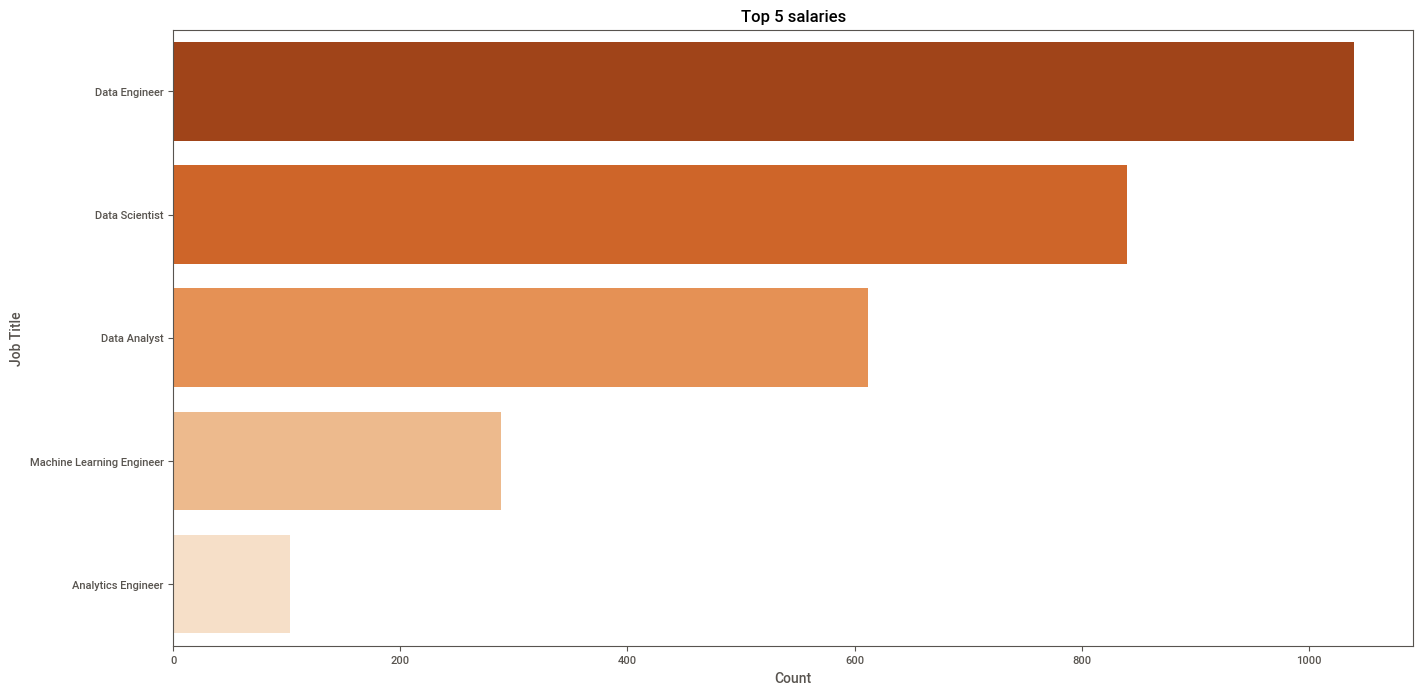

In [105]:
plt.figure(figsize = (16, 8))

top_jobs = df['job_title'].value_counts().nlargest(5)
_ = sns.barplot(x = top_jobs, y = top_jobs.index, palette='Oranges_r')

plt.xlabel('Count')
plt.ylabel('Job Title')
_ = plt.title('Top 5 salaries')

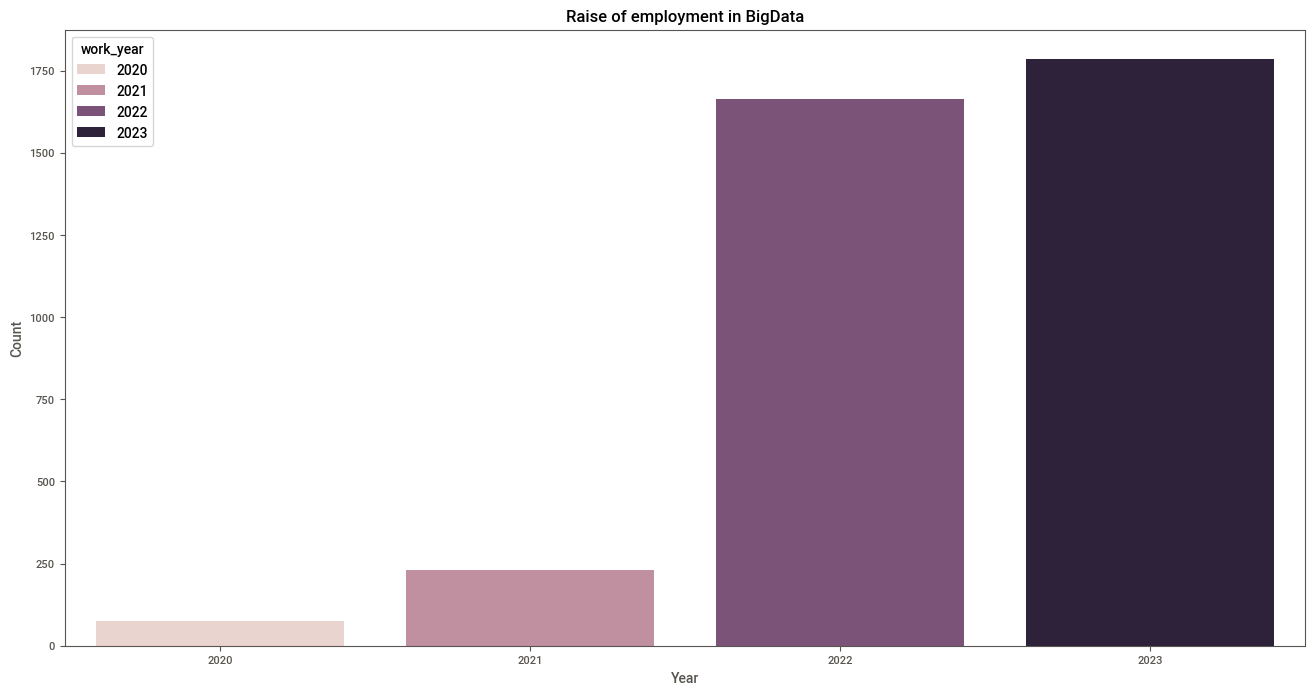

In [106]:
plt.figure(figsize = (16,8))
sns.countplot(data = df, x = 'work_year', hue='work_year')
plt.xlabel('Year')
plt.ylabel('Count')
_ = plt.title('Raise of employment in BigData')

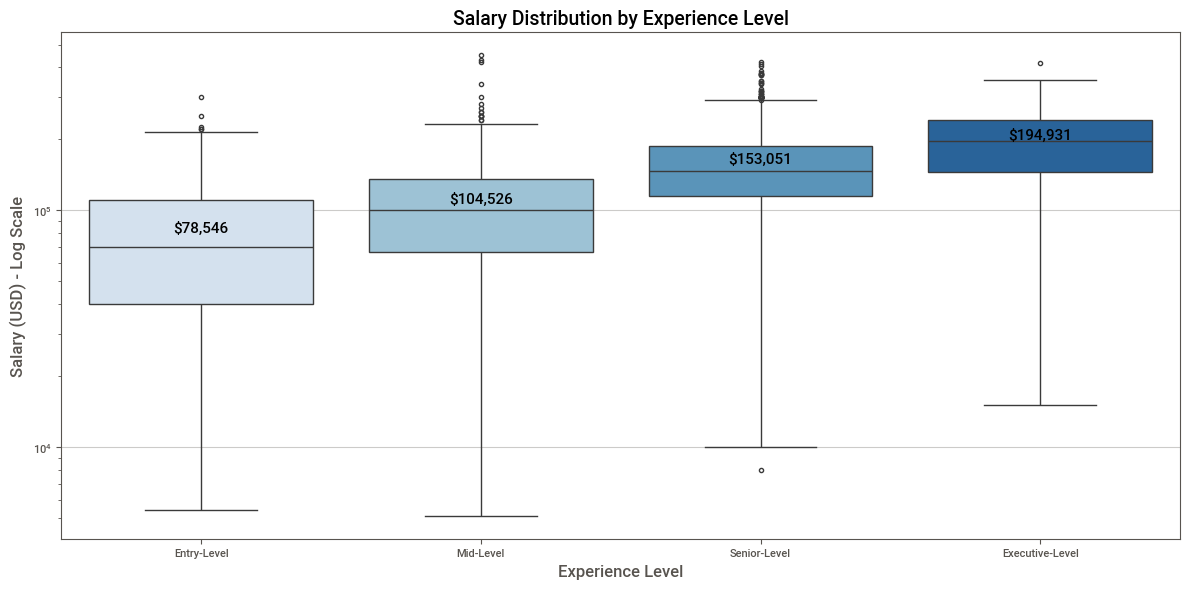

In [126]:
# ============================================
# Q1: EXPERIENCE LEVEL VS SALARY
# ============================================


# First, ensure your experience_level is properly ordered
experience_order = ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level']
df['experience_level'] = pd.Categorical(df['experience_level'], 
                                       categories=experience_order, 
                                       ordered=True)

# Create the boxplot - FIXED for seaborn v0.14.0+
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, 
            x='experience_level', 
            y='salary_in_usd', 
            hue='experience_level',  # Assign x to hue
            palette='Blues',
            legend=False)           # Disable legend since it's redundant
plt.yscale('log')
plt.title('Salary Distribution by Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD) - Log Scale', fontsize=12)
plt.xlabel('Experience Level', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add mean values on top of each box
means = df.groupby('experience_level', observed=True)['salary_in_usd'].mean().round(0)
for i, (level, mean) in enumerate(means.items()):
    plt.text(i, mean, f'${mean:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

In [127]:
experience_order

['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level']

In [128]:
exp_salary_stats = df.groupby('experience_level', observed=True)['salary_in_usd'].agg(['mean', 'median', 'count', 'std', 'min', 'max']).round(2)

print(exp_salary_stats)

                       mean    median  count       std    min     max
experience_level                                                     
Entry-Level        78546.28   70000.0    320  52225.42   5409  300000
Mid-Level         104525.94  100000.0    805  54387.69   5132  450000
Senior-Level      153051.07  146000.0   2516  56896.26   8000  423834
Executive-Level   194930.93  196000.0    114  70661.93  15000  416000


SALARY STATISTICS BY COMPANY SIZE
              count       mean    median       std   min     max
company_size                                                    
Small           148   78226.68   62146.0  61955.14  5679  416000
Medium         3153  143130.55  140000.0  58992.81  5132  450000
Large           454  118300.98  108500.0  75832.39  5409  423834 



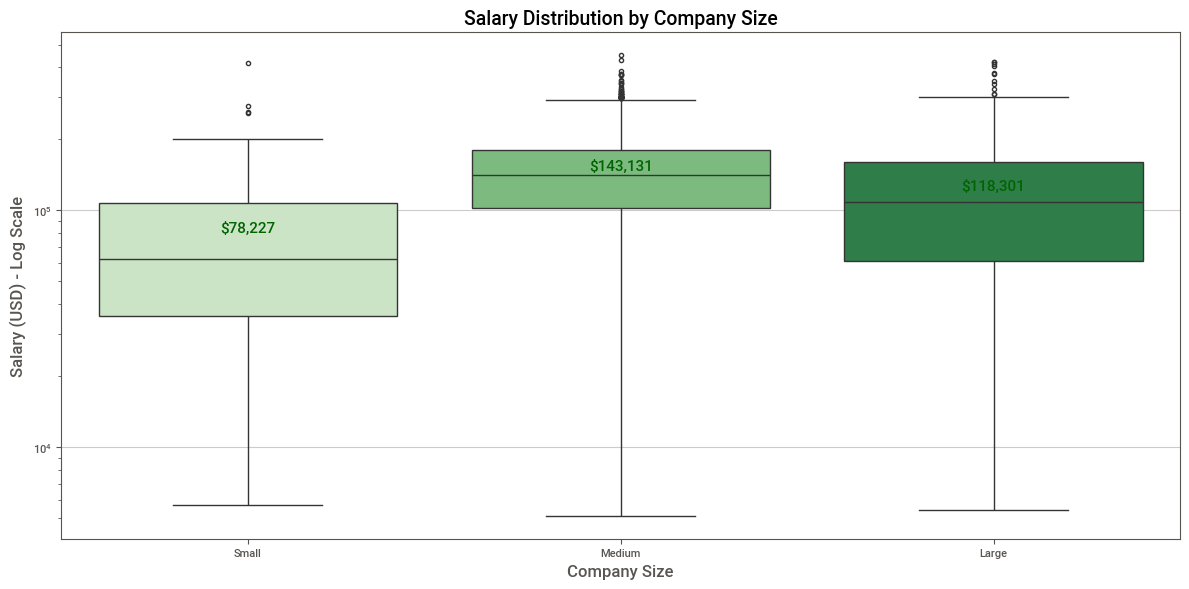

In [145]:
# ============================================
# Q2: GEOGRAPHICAL DISTRIBUTION OVER YEARS
# ============================================

# Statistical summary
print("SALARY STATISTICS BY COMPANY SIZE")

size_salary_stats = df.groupby('company_size', observed=True)['salary_in_usd'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print(size_salary_stats, "\n")

# Visualization 1: Box Plot (without emoji)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, 
            x='company_size', 
            y='salary_in_usd',
            hue='company_size',
            palette='Greens',
            legend=False)
plt.yscale('log')
plt.title('Salary Distribution by Company Size', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD) - Log Scale', fontsize=12)
plt.xlabel('Company Size', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add mean values
for i, (size, stats) in enumerate(size_salary_stats.iterrows()):
    plt.text(i, stats['mean'], f'${stats["mean"]:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=11, 
             color='darkgreen')

plt.tight_layout()
plt.show()

In [150]:
# ============================================
# Q3: COMPANY SIZE VS SALARY
# ============================================

# Top 10 countries overall
top_countries = df['company_location'].value_counts().head(10)
print("\nTOP 10 COUNTRIES FOR DATA JOBS (Overall):")
for country, count in top_countries.items():
    pct = (count/len(df))*100
    print(f"  {country}: {count} jobs ({pct:.1f}%)")

# Geographical distribution by year
yearly_location = pd.crosstab(df['work_year'], df['company_location'])

# Get top 5 countries for each year
print("\nTOP 5 COUNTRIES BY YEAR:")
for year in sorted(df['work_year'].unique()):
    print(f"\n  {year}:")
    year_data = df[df['work_year'] == year]['company_location'].value_counts().head(5)
    for country, count in year_data.items():
        pct = (count/len(df[df['work_year'] == year]))*100
        print(f"    {country}: {count} jobs ({pct:.1f}%)")



TOP 10 COUNTRIES FOR DATA JOBS (Overall):
  US: 3040 jobs (81.0%)
  GB: 172 jobs (4.6%)
  CA: 87 jobs (2.3%)
  ES: 77 jobs (2.1%)
  IN: 58 jobs (1.5%)
  DE: 56 jobs (1.5%)
  FR: 34 jobs (0.9%)
  BR: 15 jobs (0.4%)
  AU: 14 jobs (0.4%)
  GR: 14 jobs (0.4%)

TOP 5 COUNTRIES BY YEAR:

  2020:
    US: 31 jobs (40.8%)
    DE: 7 jobs (9.2%)
    IN: 6 jobs (7.9%)
    FR: 5 jobs (6.6%)
    GB: 4 jobs (5.3%)

  2021:
    US: 100 jobs (43.5%)
    IN: 20 jobs (8.7%)
    DE: 16 jobs (7.0%)
    GB: 15 jobs (6.5%)
    CA: 11 jobs (4.8%)

  2022:
    US: 1339 jobs (80.5%)
    GB: 87 jobs (5.2%)
    ES: 41 jobs (2.5%)
    CA: 38 jobs (2.3%)
    IN: 20 jobs (1.2%)

  2023:
    US: 1570 jobs (88.0%)
    GB: 66 jobs (3.7%)
    CA: 36 jobs (2.0%)
    ES: 28 jobs (1.6%)
    DE: 14 jobs (0.8%)


In [158]:
# ============================================
# Q4: GROWTH OF DATA PROFESSIONALS (2020-2023)
# ============================================

# Yearly counts
yearly_counts = df['work_year'].value_counts().sort_index()
total_jobs = len(df)

print("\nYEARLY JOB COUNTS:")
for year, count in yearly_counts.items():
    pct = (count/total_jobs)*100
    print(f"  {year}: {count} jobs ({pct:.1f}% of total)")


# Calculate growth rates
yearly_growth = yearly_counts.pct_change() * 100
print("\nYEAR-OVER-YEAR GROWTH RATES:")
for year in yearly_growth.index[1:]:
    print(f"  {year}: +{yearly_growth[year]:.1f}% from previous year")


# Cumulative growth
first_year = yearly_counts.index[0]
last_year = yearly_counts.index[-1]
total_growth = ((yearly_counts[last_year] - yearly_counts[first_year]) / yearly_counts[first_year]) * 100
print(f"\nTOTAL GROWTH ({first_year}-{last_year}): +{total_growth:.1f}%")

# CAGR (Compound Annual Growth Rate)
years_span = last_year - first_year
cagr = (pow((yearly_counts[last_year] / yearly_counts[first_year]), 1/years_span) - 1) * 100
print(f"CAGR (Compound Annual Growth Rate): {cagr:.1f}%")


YEARLY JOB COUNTS:
  2020: 76 jobs (2.0% of total)
  2021: 230 jobs (6.1% of total)
  2022: 1664 jobs (44.3% of total)
  2023: 1785 jobs (47.5% of total)

YEAR-OVER-YEAR GROWTH RATES:
  2021: +202.6% from previous year
  2022: +623.5% from previous year
  2023: +7.3% from previous year

TOTAL GROWTH (2020-2023): +2248.7%
CAGR (Compound Annual Growth Rate): 186.4%


In [170]:
# ============================================
# Q5: PANDEMIC IMPACT ON DATA PROFESSIONALS
# ============================================

# Define periods
df['period'] = df['work_year'].apply(lambda x: 'Pre-Pandemic (2020)' if x == 2020 
                                      else 'Early Pandemic (2021)' if x == 2021
                                      else 'Late Pandemic (2022-2023)')


# Counts by period
period_counts = df['period'].value_counts()
print("\nJOB COUNTS BY PERIOD:")
for period in ['Pre-Pandemic (2020)', 'Early Pandemic (2021)', 'Late Pandemic (2022-2023)']:
    count = period_counts.get(period, 0)
    print(f"  {period}: {count} jobs")


# Calculate growth during pandemic
pre_count = len(df[df['work_year'] == 2020])
pandemic_count = len(df[df['work_year'] > 2020])
growth_pct = ((pandemic_count - pre_count) / pre_count) * 100

print(f"\nPANDEMIC IMPACT METRICS:")
print(f"  Pre-pandemic (2020): {pre_count} jobs")
print(f"  Pandemic era (2021-2023): {pandemic_count} jobs")
print(f"  Growth during pandemic: +{growth_pct:.1f}%")

# Year-over-year during pandemic years
print("\nYEARLY GROWTH DURING PANDEMIC:")
pandemic_years = [2021, 2022, 2023]
for i, year in enumerate(pandemic_years):
    if i == 0:
        prev_year = 2020
    else:
        prev_year = pandemic_years[i-1]

    curr_count = len(df[df['work_year'] == year])
    prev_count = len(df[df['work_year'] == prev_year])
    yoy_growth = ((curr_count - prev_count) / prev_count) * 100
    print(f"  {prev_year} → {year}: +{yoy_growth:.1f}%")

# Salary comparison
print("\nSALARY COMPARISON: PRE-PANDEMIC vs PANDEMIC")
pre_salary = df[df['work_year'] == 2020]['salary_in_usd']
pandemic_salary = df[df['work_year'] > 2020]['salary_in_usd']

print(f"  Pre-pandemic avg salary: ${pre_salary.mean():,.0f}")
print(f"  Pandemic era avg salary: ${pandemic_salary.mean():,.0f}")
print(f"  Change: ${pandemic_salary.mean() - pre_salary.mean():+,.0f} ({(pandemic_salary.mean()/pre_salary.mean() - 1)*100:+.1f}%)")

# Statistical test for salary difference
from scipy import stats
t_stat, p_value = stats.ttest_ind(pre_salary.values, pandemic_salary.values)
print(f"\nSTATISTICAL TEST (salary difference):")
print(f"  t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
print(f"  {'Significant difference' if p_value < 0.05 else 'No significant difference'} in salaries")


JOB COUNTS BY PERIOD:
  Pre-Pandemic (2020): 76 jobs
  Early Pandemic (2021): 230 jobs
  Late Pandemic (2022-2023): 3449 jobs

PANDEMIC IMPACT METRICS:
  Pre-pandemic (2020): 76 jobs
  Pandemic era (2021-2023): 3679 jobs
  Growth during pandemic: +4740.8%

YEARLY GROWTH DURING PANDEMIC:
  2020 → 2021: +202.6%
  2021 → 2022: +623.5%
  2022 → 2023: +7.3%

SALARY COMPARISON: PRE-PANDEMIC vs PANDEMIC
  Pre-pandemic avg salary: $92,303
  Pandemic era avg salary: $138,506
  Change: $+46,203 (+50.1%)

STATISTICAL TEST (salary difference):
  t-statistic = -6.36, p-value = 0.0000
  Significant difference in salaries


In [176]:
# ============================================
# Q6: HIGHEST-PAID DATA PROFESSIONALS
# ============================================

# Top 10 job titles by average salary (min 5 entries for reliability)
job_salaries = df.groupby('job_title')['salary_in_usd'].agg(['mean', 'median', 'count', 'max', 'min']).round(2)
job_salaries = job_salaries[job_salaries['count'] >= 5]  # Filter for reliability
top_jobs = job_salaries.sort_values('mean', ascending=False).head(10)

print("\nTOP 10 HIGHEST-PAID JOB TITLES:")
print(top_jobs)

# Top 10 individual salaries
top_individuals = df.nlargest(10, 'salary_in_usd')[['job_title', 'experience_level', 
                                                     'company_size', 'salary_in_usd', 
                                                     'work_year', 'company_location']]
print("\nTOP 10 INDIVIDUAL SALARIES:")
print(top_individuals.to_string(index=False))

# Top roles by experience level
print("\nHIGHEST-PAID ROLE BY EXPERIENCE LEVEL:")
for level in experience_order:
    level_df = df[df['experience_level'] == level]
    if len(level_df) > 0:
        top_role = level_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(1)
        print(f"  {level}: {top_role.index[0]} (${top_role.values[0]:,.0f})")


# Additional insight: Most common high-paying roles
print("\nMOST COMMON HIGH-PAYING ROLES (Top 10 by frequency):")
common_high = df[df['salary_in_usd'] > df['salary_in_usd'].quantile(0.75)]['job_title'].value_counts().head(10)
for role, count in common_high.items():
    print(f"  {role}: {count} positions")


TOP 10 HIGHEST-PAID JOB TITLES:
                                         mean    median  count     max     min
job_title                                                                     
Principal Data Scientist            198171.12  164630.5      8  416000   85847
Director of Data Science            195140.73  168000.0     11  353200   57786
Machine Learning Software Engineer  192420.00  181800.0     10  375000   10000
Data Science Manager                191278.78  183780.0     58  300000   54094
Applied Scientist                   190264.48  191737.5     58  350000   72000
Head of Data                        183857.50  202500.0     10  329500   31520
Data Infrastructure Engineer        175051.67  183655.0      6  190000  143000
Machine Learning Scientist          163220.08  167875.0     26  260000   12000
Research Engineer                   163108.38  155000.0     37  293000   60000
Data Architect                      161713.77  160000.0    101  376080   63000

TOP 10 INDIVIDUAL 

In [180]:
# ============================================
# EXECUTIVE SUMMARY (Self-contained version)
# ============================================

# Calculate all needed statistics from scratch
print("\nCalculating summary statistics...")

# Experience Level stats
exp_stats = df.groupby('experience_level', observed=True)['salary_in_usd'].agg(['mean', 'median', 'count']).round(2)
entry_mean = exp_stats.loc['Entry-Level', 'mean']
senior_mean = exp_stats.loc['Senior-Level', 'mean']
exp_premium = ((senior_mean/entry_mean)-1)*100

# Company Size stats
size_stats = df.groupby('company_size', observed=True)['salary_in_usd'].agg(['mean', 'median', 'count']).round(2)
small_mean = size_stats.loc['Small', 'mean']
large_mean = size_stats.loc['Large', 'mean']
size_premium = ((large_mean/small_mean)-1)*100

# Geographical stats
top_countries = df['company_location'].value_counts().head(10)
top_country = top_countries.index[0]
top_country_count = top_countries.values[0]
top_country_pct = (top_country_count/len(df))*100

# Growth stats
yearly_counts = df['work_year'].value_counts().sort_index()
total_growth = ((yearly_counts[2023] - yearly_counts[2020]) / yearly_counts[2020]) * 100
years_span = 2023 - 2020
cagr = (pow((yearly_counts[2023] / yearly_counts[2020]), 1/years_span) - 1) * 100

# Pandemic stats
pre_salary = df[df['work_year'] == 2020]['salary_in_usd']
pandemic_salary = df[df['work_year'] > 2020]['salary_in_usd']
pre_count = len(df[df['work_year'] == 2020])
pandemic_count = len(df[df['work_year'] > 2020])
growth_pct = ((pandemic_count - pre_count) / pre_count) * 100
salary_change = pandemic_salary.mean() - pre_salary.mean()
salary_trend = "increased" if salary_change > 0 else "decreased"

# Highest-paid roles
job_salaries = df.groupby('job_title')['salary_in_usd'].agg(['mean', 'median', 'count']).round(2)
job_salaries = job_salaries[job_salaries['count'] >= 5]
top_jobs = job_salaries.sort_values('mean', ascending=False).head(10)
top_individuals = df.nlargest(10, 'salary_in_usd')[['job_title', 'experience_level', 
                                                     'company_size', 'salary_in_usd', 
                                                     'work_year', 'company_location']]

# Create summary
summary_data = {
    'Question': [
        '1. Experience Level & Salary',
        '2. Company Size & Salary',
        '3. Geographical Distribution',
        '4. Growth (2020-2023)',
        '5. Pandemic Impact',
        '6. Highest-Paid Role'
    ],
    'Key Finding': [
        f"Senior-Level earns ${exp_stats.loc['Senior-Level', 'mean']:,.0f} avg ({exp_premium:.0f}% more than Entry-Level)",
        
        f"Large companies pay ${size_stats.loc['Large', 'mean']:,.0f} avg ({size_premium:.0f}% more than Small)",
        
        f"Top country: {top_country} ({top_country_count} jobs, {top_country_pct:.0f}% of total)",
        
        f"Grew from {yearly_counts[2020]} to {yearly_counts[2023]} jobs ({total_growth:.0f}% total growth, {cagr:.1f}% CAGR)",
        
        f"Pandemic era: +{growth_pct:.0f}% job growth | Salary {salary_trend} by ${abs(salary_change):,.0f}",
        
        f"{top_jobs.index[0]}: ${top_jobs.iloc[0]['mean']:,.0f} avg | Top individual: ${top_individuals.iloc[0]['salary_in_usd']:,.0f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
for i, row in summary_df.iterrows():
    print(f"\n{row['Question']}")
    print(f"  {row['Key Finding']}")

print("\n\nANALYSIS COMPLETE")


Calculating summary statistics...


1. Experience Level & Salary
  Senior-Level earns $153,051 avg (95% more than Entry-Level)

2. Company Size & Salary
  Large companies pay $118,301 avg (51% more than Small)

3. Geographical Distribution
  Top country: US (3040 jobs, 81% of total)

4. Growth (2020-2023)
  Grew from 76 to 1785 jobs (2249% total growth, 186.4% CAGR)

5. Pandemic Impact
  Pandemic era: +4741% job growth | Salary increased by $46,203

6. Highest-Paid Role
  Principal Data Scientist: $198,171 avg | Top individual: $450,000


ANALYSIS COMPLETE
